In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv('transformerTest.csv')
df

,experiment,epoch,loss,date,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr
0,resnet18_bs64_ft0_l3_h2,7,34.971737,2020-04-14 02:20:29.628194,0.599028,0.410557,0.270868,0.175255,0.177569,0.424562,0.411986
1,resnet18_bs64_ft0_l3_h3,5,36.696003,2020-04-14 02:21:58.339567,0.593035,0.404246,0.266077,0.170251,0.177708,0.426062,0.404513
2,resnet18_bs64_ft0_l3_h1,14,30.861296,2020-04-14 02:38:20.238108,0.603446,0.415454,0.278294,0.183825,0.185203,0.432942,0.442006
3,resnet101_bs32_ft0_l3_h1,5,25.823503,2020-04-14 03:23:34.208827,0.600923,0.415258,0.276389,0.178393,0.193691,0.441675,0.476929
4,resnet50_bs32_ft0_l3_h1,4,28.605141,2020-04-14 03:33:58.347680,0.604352,0.413888,0.273113,0.176069,0.186552,0.438031,0.442530
5,resnet18_bs64_ft1_l3_h2,5,34.249241,2020-04-14 03:45:46.444009,0.614498,0.425774,0.283747,0.185593,0.181799,0.434779,0.436090
6,resnet18_bs64_ft1_l3_h1,5,35.884186,2020-04-14 03:52:25.732814,0.604362,0.414753,0.272456,0.176633,0.180171,0.429086,0.407301
7,resnet18_bs64_ft1_l3_h3,5,33.164302,2020-04-14 04:01:51.875213,0.611619,0.427515,0.288846,0.189154,0.184413,0.435905,0.437422
8,resnet18_bs64_ft0_l5_h2,8,32.284586,2020-04-14 05:44:55.769457,0.582837,0.395447,0.259445,0.168853,0.181329,0.424428,0.415012
9,resnet18_bs64_ft0_l5_h1,12,30.367127,2020-04-14 05:50:12.027941,0.597134,0.406801,0.271981,0.179442,0.184896,0.433609,0.445623


In [3]:
exp_idx_to_label = {
  0: 'encoder',
  1: 'batch_size',
  2: 'fine_tune',
  3: 'num_layers',
  4: 'num_heads'
}

for index, row in df.iterrows():
  for exp_idx, item in enumerate(row['experiment'].split('_')):
    if exp_idx in exp_idx_to_label:
      item = int(re.sub("[^0-9]", "", item)) if exp_idx != 0 else item
      df.at[index, exp_idx_to_label[exp_idx]] = item
      
df.tail()

,experiment,epoch,loss,date,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr,encoder,batch_size,fine_tune,num_layers,num_heads
17,resnet18_bs64_ft0_l7_h2,8,31.164044,2020-04-14 09:38:03.013357,0.599129,0.404365,0.268257,0.173622,0.180408,0.431275,0.427909,resnet18,64.0,0.0,7.0,2.0
18,resnet18_bs64_ft0_l7_h3,6,32.963183,2020-04-14 10:47:05.866288,0.587479,0.404814,0.271543,0.179652,0.178342,0.422083,0.428405,resnet18,64.0,0.0,7.0,3.0
19,resnet18_bs64_ft1_l7_h1,9,26.853946,2020-04-14 11:01:31.455101,0.594014,0.406635,0.271229,0.176386,0.184515,0.429441,0.430924,resnet18,64.0,1.0,7.0,1.0
20,resnet18_bs64_ft1_l7_h2,5,32.506078,2020-04-14 11:43:08.079961,0.609951,0.424812,0.289438,0.190999,0.190561,0.440086,0.460644,resnet18,64.0,1.0,7.0,2.0
21,resnet18_bs64_ft1_l7_h3,3,37.734134,2020-04-14 13:07:11.017764,0.616405,0.431141,0.289078,0.187608,0.186453,0.440246,0.439594,resnet18,64.0,1.0,7.0,3.0


## Experiment 1: Effect of improved image feature quality

In [4]:
img_quality_df = df[(df['num_layers'] == 3) & (df['num_heads'] == 1) & (df['fine_tune'] == 0)]
img_quality_df = img_quality_df.drop(['date', 'experiment', 'epoch', 'loss', 'fine_tune'], axis = 1) 
img_quality_df = img_quality_df.set_index('encoder').reindex(["resnet18", "resnet50", "resnet101"])
img_quality_df

,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr,batch_size,num_layers,num_heads
encoder,,,,,,,,,,
resnet18,0.603446,0.415454,0.278294,0.183825,0.185203,0.432942,0.442006,64.0,3.0,1.0
resnet50,0.604352,0.413888,0.273113,0.176069,0.186552,0.438031,0.442530,32.0,3.0,1.0
resnet101,0.600923,0.415258,0.276389,0.178393,0.193691,0.441675,0.476929,32.0,3.0,1.0


Text(0.5, 1.0, 'Effect of improved image feature extraction on scores')

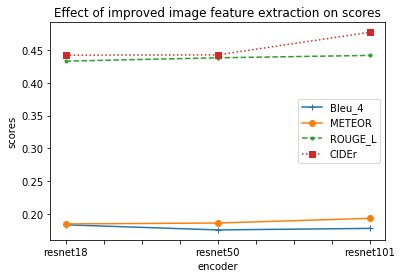

In [5]:
ax = img_quality_df[['Bleu_4', 'METEOR', 'ROUGE_L', 'CIDEr']].plot(style=['+-','o-','.--','s:'])
ax.set_ylabel("scores")
ax.set_title("Effect of improved image feature extraction on scores")

## Experiment 2: Effect of fine-tuning the encoders

In [6]:
img_quality_df = df[(df['num_layers'] == 3) & (df['num_heads'] == 1)]
print(img_quality_df.shape)
img_quality_df = img_quality_df.drop(['date', 'experiment', 'epoch', 'loss'], axis = 1) 
img_quality_df = img_quality_df.sort_values(by=['encoder', 'fine_tune'])

img_quality_df

(6, 16)


,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr,encoder,batch_size,fine_tune,num_layers,num_heads
3,0.600923,0.415258,0.276389,0.178393,0.193691,0.441675,0.476929,resnet101,32.0,0.0,3.0,1.0
10,0.613705,0.432510,0.295240,0.196943,0.199555,0.454412,0.521783,resnet101,32.0,1.0,3.0,1.0
2,0.603446,0.415454,0.278294,0.183825,0.185203,0.432942,0.442006,resnet18,64.0,0.0,3.0,1.0
6,0.604362,0.414753,0.272456,0.176633,0.180171,0.429086,0.407301,resnet18,64.0,1.0,3.0,1.0
4,0.604352,0.413888,0.273113,0.176069,0.186552,0.438031,0.442530,resnet50,32.0,0.0,3.0,1.0
12,0.614799,0.432077,0.292478,0.191512,0.190302,0.446230,0.479676,resnet50,32.0,1.0,3.0,1.0


In [7]:
finetuned_diff_df = img_quality_df.set_index(['encoder']).groupby('encoder').diff()

finetuned_diff_df = finetuned_diff_df.dropna()
finetuned_diff_df = finetuned_diff_df.reindex(["resnet18", "resnet50", "resnet101"])
finetuned_diff_df

,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr,batch_size,fine_tune,num_layers,num_heads
encoder,,,,,,,,,,,
resnet18,0.000916,-0.000701,-0.005837,-0.007192,-0.005032,-0.003856,-0.034706,0.0,1.0,0.0,0.0
resnet50,0.010447,0.018188,0.019366,0.015444,0.003750,0.008198,0.037147,0.0,1.0,0.0,0.0
resnet101,0.012782,0.017252,0.018850,0.018549,0.005864,0.012737,0.044854,0.0,1.0,0.0,0.0


Text(0.5, 1.0, 'Difference of scores with and without fine-tuning')

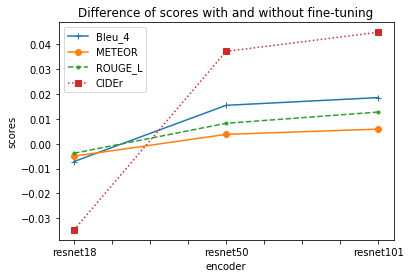

In [8]:
ax = finetuned_diff_df[['Bleu_4', 'METEOR', 'ROUGE_L', 'CIDEr']].plot(style=['+-','o-','.--','s:'])
ax.set_ylabel("scores")
ax.set_title("Difference of scores with and without fine-tuning")

## Experiment 3: Effect of varying number of layers in Transformer

Fixed Number of heads:  1


,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr,num_heads
num_layers,,,,,,,,
3.0,0.603446,0.415454,0.278294,0.183825,0.185203,0.432942,0.442006,1.0
5.0,0.597134,0.406801,0.271981,0.179442,0.184896,0.433609,0.445623,1.0
7.0,0.584759,0.399524,0.261832,0.168261,0.182726,0.426332,0.416908,1.0


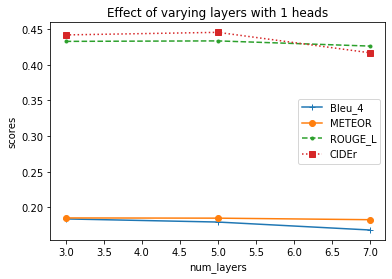

Fixed Number of heads:  2


,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr,num_heads
num_layers,,,,,,,,
3.0,0.599028,0.410557,0.270868,0.175255,0.177569,0.424562,0.411986,2.0
5.0,0.582837,0.395447,0.259445,0.168853,0.181329,0.424428,0.415012,2.0
7.0,0.599129,0.404365,0.268257,0.173622,0.180408,0.431275,0.427909,2.0


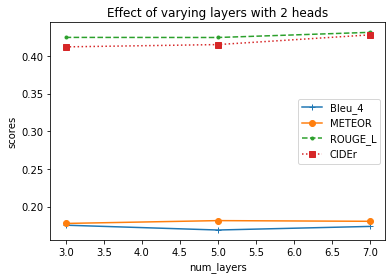

Fixed Number of heads:  3


,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr,num_heads
num_layers,,,,,,,,
3.0,0.593035,0.404246,0.266077,0.170251,0.177708,0.426062,0.404513,3.0
5.0,0.589470,0.401633,0.267192,0.175194,0.180642,0.427958,0.425501,3.0
7.0,0.587479,0.404814,0.271543,0.179652,0.178342,0.422083,0.428405,3.0


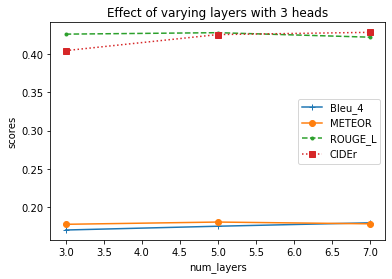

In [9]:
from IPython.display import display, HTML

for num_heads in [1,2,3]:
  num_layers_df = df[(df['fine_tune'] == 0) & (df['encoder'] == 'resnet18') & (df['num_heads'] == num_heads)] \
    .sort_values(by=['num_layers']) \
    .drop(['date', 'experiment', 'epoch', 'loss', 'fine_tune', 'batch_size', 'encoder'], axis = 1) \
    .set_index('num_layers')

  print("==================================================")
  print("Fixed Number of heads: ", num_heads)
#   print(decoder_dim_df)
  display(HTML(num_layers_df.to_html()))
  
  ax = num_layers_df[['Bleu_4', 'METEOR', 'ROUGE_L', 'CIDEr']].plot(style=['+-','o-','.--','s:'])
  ax.set_ylabel("scores")
  ax.set_title(f"Effect of varying layers with {num_heads} heads")
  plt.show()

## Experiment 4: Effect of varying number of heads in Transformer

Fixed Number of layers:  3


,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr,num_layers
num_heads,,,,,,,,
1.0,0.603446,0.415454,0.278294,0.183825,0.185203,0.432942,0.442006,3.0
2.0,0.599028,0.410557,0.270868,0.175255,0.177569,0.424562,0.411986,3.0
3.0,0.593035,0.404246,0.266077,0.170251,0.177708,0.426062,0.404513,3.0


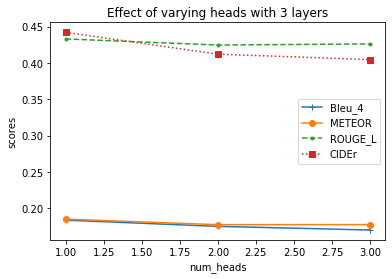

Fixed Number of layers:  5


,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr,num_layers
num_heads,,,,,,,,
1.0,0.597134,0.406801,0.271981,0.179442,0.184896,0.433609,0.445623,5.0
2.0,0.582837,0.395447,0.259445,0.168853,0.181329,0.424428,0.415012,5.0
3.0,0.589470,0.401633,0.267192,0.175194,0.180642,0.427958,0.425501,5.0


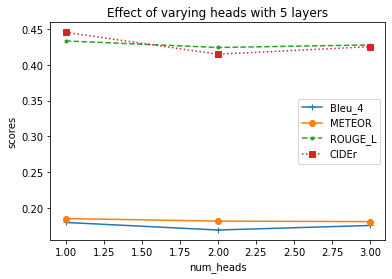

Fixed Number of layers:  7


,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr,num_layers
num_heads,,,,,,,,
1.0,0.584759,0.399524,0.261832,0.168261,0.182726,0.426332,0.416908,7.0
2.0,0.599129,0.404365,0.268257,0.173622,0.180408,0.431275,0.427909,7.0
3.0,0.587479,0.404814,0.271543,0.179652,0.178342,0.422083,0.428405,7.0


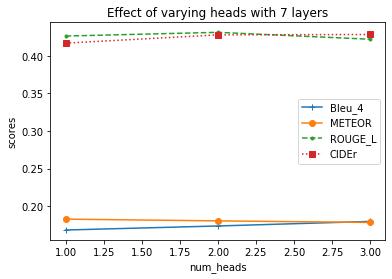

In [10]:
for num_layers in [3,5,7]:
  num_heads_df = df[(df['fine_tune'] == 0) & (df['encoder'] == 'resnet18') & (df['num_layers'] == num_layers)] \
    .sort_values(by=['num_heads']) \
    .drop(['date', 'experiment', 'epoch', 'loss', 'fine_tune', 'batch_size', 'encoder'], axis = 1) \
    .set_index('num_heads')

  print("==================================================")
  print("Fixed Number of layers: ", num_layers)
#   print(decoder_dim_df)
  display(HTML(num_heads_df.to_html()))
  
  ax = num_heads_df[['Bleu_4', 'METEOR', 'ROUGE_L', 'CIDEr']].plot(style=['+-','o-','.--','s:'])
  ax.set_ylabel("scores")
  ax.set_title(f"Effect of varying heads with {num_layers} layers")
  plt.show()